In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# get the output for all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

tar: lla\AppData\Local: Couldn't visit directory: No such file or directory
tar: Error exit delayed from previous errors.


In [2]:
df = pd.read_csv(r"C:\Users\palla\OneDrive\Documents\demo_data\4.linearsep.csv",header=None)

In [4]:
df.head()

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


In [5]:
df.shape

(100, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


<AxesSubplot:xlabel='0', ylabel='1'>

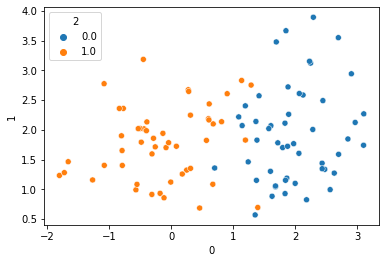

In [7]:
sns.scatterplot(x=0,y=1,hue=2,data=df)

## Split the data into train and test

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[[0,1]],df[2],test_size=0.1)

In [4]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [5]:
#Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans = std.fit_transform(X_train)
X_test_trans = std.transform(X_test)

## Build the neural networks

In [43]:
model = Sequential()
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform',input_dim=2))
model.add(Dropout(0.25))
model.add(Dense(75,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               300       
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 75)                7575      
                                                                 
 dropout_1 (Dropout)         (None, 75)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 76        
                                                                 
Total params: 7,951
Trainable params: 7,951
Non-trainable params: 0
_________________________________________________________________


In [45]:
# compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
history = model.fit(X_train,y_train,batch_size=10,epochs=500,validation_split=0.2)

Epoch 1/500
8/8 [==============================] - 1s 27ms/step - loss: 0.9620 - accuracy: 0.6250 - val_loss: 0.4793 - val_accuracy: 0.8333
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 0.5357 - accuracy: 0.6944 - val_loss: 0.4518 - val_accuracy: 0.8333
Epoch 3/500
8/8 [==============================] - 0s 8ms/step - loss: 0.3967 - accuracy: 0.7778 - val_loss: 0.3179 - val_accuracy: 0.8333
Epoch 4/500
8/8 [==============================] - 0s 8ms/step - loss: 0.4070 - accuracy: 0.8611 - val_loss: 0.2553 - val_accuracy: 0.8889
Epoch 5/500
8/8 [==============================] - 0s 9ms/step - loss: 0.3329 - accuracy: 0.8889 - val_loss: 0.2164 - val_accuracy: 0.8889
Epoch 6/500
8/8 [==============================] - 0s 9ms/step - loss: 0.2806 - accuracy: 0.8750 - val_loss: 0.2082 - val_accuracy: 0.8889
Epoch 7/500
8/8 [==============================] - 0s 9ms/step - loss: 0.3532 - accuracy: 0.8750 - val_loss: 0.2102 - val_accuracy: 0.8889
Epoch 8/500
8/8 [=========

8/8 [==============================] - 0s 7ms/step - loss: 0.1912 - accuracy: 0.9444 - val_loss: 0.1533 - val_accuracy: 0.8889
Epoch 118/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1559 - accuracy: 0.9444 - val_loss: 0.1634 - val_accuracy: 0.8889
Epoch 119/500
8/8 [==============================] - 0s 7ms/step - loss: 0.1549 - accuracy: 0.9167 - val_loss: 0.1902 - val_accuracy: 0.8889
Epoch 120/500
8/8 [==============================] - 0s 7ms/step - loss: 0.1063 - accuracy: 0.9583 - val_loss: 0.1780 - val_accuracy: 0.8889
Epoch 121/500
8/8 [==============================] - 0s 7ms/step - loss: 0.1251 - accuracy: 0.9444 - val_loss: 0.1628 - val_accuracy: 0.8889
Epoch 122/500
8/8 [==============================] - 0s 7ms/step - loss: 0.1188 - accuracy: 0.9444 - val_loss: 0.1654 - val_accuracy: 0.8889
Epoch 123/500
8/8 [==============================] - 0s 7ms/step - loss: 0.1398 - accuracy: 0.9167 - val_loss: 0.1838 - val_accuracy: 0.8889
Epoch 124/500
8/8 [========

8/8 [==============================] - 0s 10ms/step - loss: 0.1112 - accuracy: 0.9583 - val_loss: 0.1548 - val_accuracy: 0.8889
Epoch 234/500
8/8 [==============================] - 0s 10ms/step - loss: 0.1069 - accuracy: 0.9583 - val_loss: 0.1442 - val_accuracy: 0.9444
Epoch 235/500
8/8 [==============================] - 0s 10ms/step - loss: 0.1139 - accuracy: 0.9583 - val_loss: 0.1484 - val_accuracy: 0.9444
Epoch 236/500
8/8 [==============================] - 0s 9ms/step - loss: 0.1222 - accuracy: 0.9583 - val_loss: 0.1925 - val_accuracy: 0.8889
Epoch 237/500
8/8 [==============================] - 0s 11ms/step - loss: 0.1205 - accuracy: 0.9722 - val_loss: 0.2058 - val_accuracy: 0.8889
Epoch 238/500
8/8 [==============================] - 0s 12ms/step - loss: 0.1189 - accuracy: 0.9583 - val_loss: 0.1965 - val_accuracy: 0.8889
Epoch 239/500
8/8 [==============================] - 0s 11ms/step - loss: 0.0978 - accuracy: 0.9583 - val_loss: 0.1823 - val_accuracy: 0.8889
Epoch 240/500
8/8 [==

8/8 [==============================] - 0s 9ms/step - loss: 0.1358 - accuracy: 0.9306 - val_loss: 0.1625 - val_accuracy: 0.8889
Epoch 292/500
8/8 [==============================] - 0s 9ms/step - loss: 0.1071 - accuracy: 0.9583 - val_loss: 0.1692 - val_accuracy: 0.8889
Epoch 293/500
8/8 [==============================] - 0s 9ms/step - loss: 0.1066 - accuracy: 0.9583 - val_loss: 0.1638 - val_accuracy: 0.8889
Epoch 294/500
8/8 [==============================] - 0s 7ms/step - loss: 0.1281 - accuracy: 0.9583 - val_loss: 0.1496 - val_accuracy: 0.9444
Epoch 295/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1091 - accuracy: 0.9444 - val_loss: 0.1492 - val_accuracy: 0.9444
Epoch 296/500
8/8 [==============================] - 0s 7ms/step - loss: 0.1134 - accuracy: 0.9444 - val_loss: 0.1486 - val_accuracy: 0.9444
Epoch 297/500
8/8 [==============================] - 0s 9ms/step - loss: 0.1368 - accuracy: 0.9444 - val_loss: 0.1531 - val_accuracy: 0.9444
Epoch 298/500
8/8 [========

8/8 [==============================] - 0s 8ms/step - loss: 0.0833 - accuracy: 0.9583 - val_loss: 0.1711 - val_accuracy: 0.9444
Epoch 408/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0867 - accuracy: 0.9722 - val_loss: 0.1814 - val_accuracy: 0.8889
Epoch 409/500
8/8 [==============================] - 0s 8ms/step - loss: 0.1206 - accuracy: 0.9583 - val_loss: 0.1885 - val_accuracy: 0.8889
Epoch 410/500
8/8 [==============================] - 0s 10ms/step - loss: 0.1267 - accuracy: 0.9583 - val_loss: 0.1792 - val_accuracy: 0.9444
Epoch 411/500
8/8 [==============================] - 0s 10ms/step - loss: 0.0939 - accuracy: 0.9722 - val_loss: 0.1747 - val_accuracy: 0.9444
Epoch 412/500
8/8 [==============================] - 0s 9ms/step - loss: 0.0981 - accuracy: 0.9444 - val_loss: 0.1772 - val_accuracy: 0.9444
Epoch 413/500
8/8 [==============================] - 0s 7ms/step - loss: 0.1162 - accuracy: 0.9583 - val_loss: 0.1744 - val_accuracy: 0.9444
Epoch 414/500
8/8 [======

8/8 [==============================] - 0s 7ms/step - loss: 0.0924 - accuracy: 0.9583 - val_loss: 0.1637 - val_accuracy: 0.9444
Epoch 466/500
8/8 [==============================] - 0s 8ms/step - loss: 0.1141 - accuracy: 0.9444 - val_loss: 0.1673 - val_accuracy: 0.9444
Epoch 467/500
8/8 [==============================] - 0s 8ms/step - loss: 0.0830 - accuracy: 0.9583 - val_loss: 0.1704 - val_accuracy: 0.9444
Epoch 468/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0894 - accuracy: 0.9583 - val_loss: 0.1760 - val_accuracy: 0.9444
Epoch 469/500
8/8 [==============================] - 0s 8ms/step - loss: 0.0637 - accuracy: 0.9722 - val_loss: 0.1797 - val_accuracy: 0.9444
Epoch 470/500
8/8 [==============================] - 0s 8ms/step - loss: 0.1005 - accuracy: 0.9444 - val_loss: 0.1843 - val_accuracy: 0.9444
Epoch 471/500
8/8 [==============================] - 0s 8ms/step - loss: 0.0909 - accuracy: 0.9722 - val_loss: 0.1792 - val_accuracy: 0.9444
Epoch 472/500
8/8 [========

In [47]:
y_cap= model.predict(X_test_trans)

1/1 [==============================] - 0s 72ms/step


In [48]:
y_cap_f = np.where(y_cap>0.5,1,0)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_cap_f)

0.9

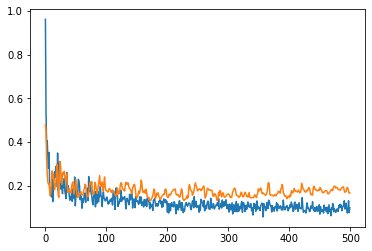

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [1]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 8s 2ms/step


<AxesSubplot:>

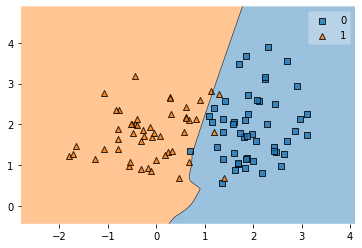

In [51]:
plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)

3888/3888 [==============================] - 8s 2ms/step


<AxesSubplot:>

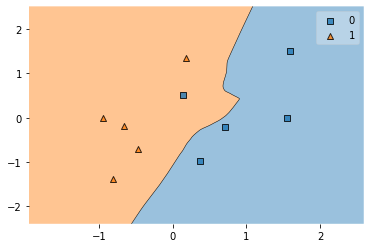

In [52]:
plot_decision_regions(X_test_trans,y_test.values.astype(int),clf=model)